In [1]:
import numpy as np

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import matplotlib.pyplot as plt
from datetime import datetime

import scipy.stats as st

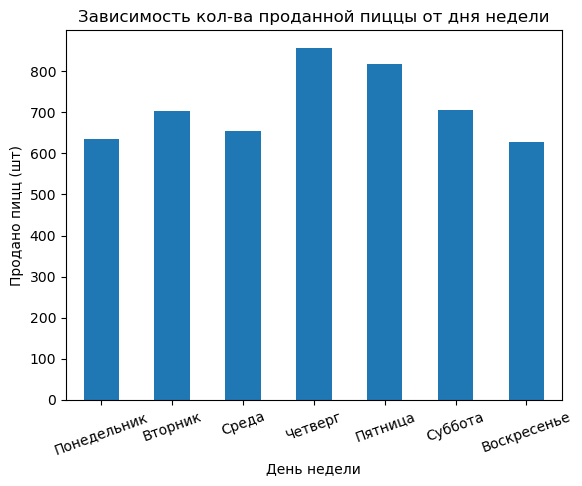

In [2]:
pizzaorder = pd.read_csv("../pizza.csv", low_memory = False, sep = ';',  parse_dates = True)

pizzaorder["order_dt"] = np.nan

for i in range(pizzaorder.shape[0]):
    pizzaorder["order_dt"].iloc[i] = pizzaorder["order_date"][i].split()[0] + ' ' + pizzaorder["order_time"][i]

#params = pizzaorder.iloc[-1]
#params

days_order = ["Понедельник", "Вторник", "Среда", "Четверг", "Пятница", "Суббота", "Воскресенье"]

pizzaorder["weekday"] = pd.to_datetime(pizzaorder["order_date"]).dt.day_name(locale = "Russian")

ax = pizzaorder["weekday"].groupby(pizzaorder["weekday"]).count().reindex(days_order).plot(kind = "bar")
locs, labels = plt.xticks()
plt.xticks(rotation = 20)
plt.title("Зависимость кол-ва проданной пиццы от дня недели")
plt.ylabel("Продано пицц (шт)")
plt.xlabel("День недели")

plt.show()

In [3]:
maximum = pizzaorder["weekday"].value_counts().index[0]
minimum = pizzaorder["weekday"].value_counts().index[-1]

print(f"{maximum} статистически оказался самым успешным для торговли пиццей днем. {minimum} же напротив.")

Четверг статистически оказался самым успешным для торговли пиццей днем. Воскресенье же напротив.


In [4]:
## Как долго готовится пицца?

pizzaorder["cook_time"] = pd.to_datetime(pizzaorder["lead_time"]) - pd.to_datetime(pizzaorder["order_dt"])
pizzaorder["cook_time"] = pizzaorder.cook_time.dt.total_seconds()

mean_cook_time = round(np.mean(pizzaorder["cook_time"]))
median_cook_time = round(np.median(pizzaorder["cook_time"]))
max_cook_time = round(max(pizzaorder["cook_time"]))
min_cook_time = round(min(pizzaorder["cook_time"]))

print(f"Среднее время приготовления пиццы: {mean_cook_time} c.")
print(f"Медианное время приготовления пиццы: {median_cook_time} c.")
print(f"Максимальное время приготовления пиццы: {max_cook_time} c.")
print(f"Минимальное время приготовления пиццы: {min_cook_time} c.")

Среднее время приготовления пиццы: 1007 c.
Медианное время приготовления пиццы: 1006 c.
Максимальное время приготовления пиццы: 1609 c.
Минимальное время приготовления пиццы: 444 c.


In [5]:
def get_ci(data, cl):
  
   mean = np.mean(data)
   mean_std = np.std(data, ddof=1)
   dev = (mean_std / np.sqrt(len(data)))

   left, right = st.norm.interval(confidence = cl, loc = mean, scale = dev)
   return round(left), round(right)

cooktime = pizzaorder["cook_time"]
cl = 0.95

#std = cooktime.std(ddof=1) /np.sqrt(len(cooktime))
#_95CI = st.t.interval(cl, len(cooktime)-1, loc=cooktime.mean(), scale = std)

_95int = get_ci(cooktime, cl)

print(f"95% доверительный интервал о среднем времени приготовления пиццы: {_95int}.")

95% доверительный интервал о среднем времени приготовления пиццы: (1002, 1012).


In [6]:
pizzarating = pizzaorder[pizzaorder["pizza_name"].map(pizzaorder["pizza_name"].value_counts()) > 100]

pizzas_1 = {}
pizzas_2 = {}

for pizza in pizzarating["pizza_name"]:
    pos = pizzarating[pizzarating["pizza_name"] == pizza]
    ct = pos["cook_time"]
    std_ = ct.std(ddof=1) / np.sqrt(len(pos))
    _100CI = st.t.interval(0.95, len(pos)-1, loc=ct.mean(), scale=std_)
    pizzas_1[pizza] = round(_100CI[1])
    pizzas_2[pizza] = (int(np.round(_100CI[1])) - int(np.round(_100CI[0])))

#pizzas

print(f"Самая высокая верхняя граница доверительного интервала у {max(pizzas_1, key=pizzas_1.get)}. 
Верхняя граница доверительного интервала ее изготовления: {max(pizzas_1.values())} секунд.")

Самая высокая верхняя граница доверительного интервала у The Italian Vegetables Pizza. Верхняя граница доверительного интервала ее изготовления: 1069 секунд.


In [7]:
print(f"Самый широкий доверительный интервал для {max(pizzas_2, key=pizzas_2.get)}.")

Самый широкий доверительный интервал для The Chicken Alfredo Pizza.
